# **Horse survival**

By using the variables present in the dataset we are going to predict the survival of the horse. We are going to use the Decision Tree method for this purpose. 

**Step 1: Setting up the work environment**

We are going to download the necessary packages for our work. We are going to view the dataset and check the datatypes.

In [130]:
# import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import math
import scipy.stats as stats
import pandas as pd
import seaborn as sb
import statsmodels.formula.api as smf
import statsmodels.api as sm
from scipy import stats
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from statsmodels.formula.api import ols
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, auc, balanced_accuracy_score, confusion_matrix, f1_score, precision_score, average_precision_score, roc_auc_score,  recall_score,  precision_recall_curve as skm
import warnings
warnings.filterwarnings("ignore")

In [2]:
#getting the dataset
horsesrv=pd.read_csv("C:\\Users\\sujoydutta\\Desktop\\Data analysis\\Datasets\\horse.csv")
horsesrv.head()

,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,...,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,outcome,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data
0,no,adult,530101,38.5,66.0,28.0,cool,reduced,NaN,more_3_sec,...,45.0,8.4,NaN,NaN,died,no,11300,0,0,no
1,yes,adult,534817,39.2,88.0,20.0,NaN,NaN,pale_cyanotic,less_3_sec,...,50.0,85.0,cloudy,2.0,euthanized,no,2208,0,0,no
2,no,adult,530334,38.3,40.0,24.0,normal,normal,pale_pink,less_3_sec,...,33.0,6.7,NaN,NaN,lived,no,0,0,0,yes
3,yes,young,5290409,39.1,164.0,84.0,cold,normal,dark_cyanotic,more_3_sec,...,48.0,7.2,serosanguious,5.3,died,yes,2208,0,0,yes
4,no,adult,530255,37.3,104.0,35.0,NaN,NaN,dark_cyanotic,more_3_sec,...,74.0,7.4,NaN,NaN,died,no,4300,0,0,no


In [3]:
#shape of the dataset
horsesrv.shape

(299, 28)

In [4]:
#dataset info
horsesrv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   surgery                299 non-null    object 
 1   age                    299 non-null    object 
 2   hospital_number        299 non-null    int64  
 3   rectal_temp            239 non-null    float64
 4   pulse                  275 non-null    float64
 5   respiratory_rate       241 non-null    float64
 6   temp_of_extremities    243 non-null    object 
 7   peripheral_pulse       230 non-null    object 
 8   mucous_membrane        252 non-null    object 
 9   capillary_refill_time  267 non-null    object 
 10  pain                   244 non-null    object 
 11  peristalsis            255 non-null    object 
 12  abdominal_distention   243 non-null    object 
 13  nasogastric_tube       195 non-null    object 
 14  nasogastric_reflux     193 non-null    object 
 15  nasoga

In [5]:
#seeing null values
horsesrv.isnull().sum()

surgery                    0
age                        0
hospital_number            0
rectal_temp               60
pulse                     24
respiratory_rate          58
temp_of_extremities       56
peripheral_pulse          69
mucous_membrane           47
capillary_refill_time     32
pain                      55
peristalsis               44
abdominal_distention      56
nasogastric_tube         104
nasogastric_reflux       106
nasogastric_reflux_ph    246
rectal_exam_feces        102
abdomen                  118
packed_cell_volume        29
total_protein             33
abdomo_appearance        165
abdomo_protein           198
outcome                    0
surgical_lesion            0
lesion_1                   0
lesion_2                   0
lesion_3                   0
cp_data                    0
dtype: int64

**Step 2: Data cleaning**

In this step, we are going to clean our dataset. We are going to look for null values and replace them with mean and mode. We are going to modify some variables if it is necessary and change datatypes for better analysis. We will also remove outliers from the dataset. Outliers hamper the machine learning algorithms and hence they have to be removed.

In [6]:
#replacing missing values with nan(Not a number) that makes things simpler for python
horsesrv.replace("?",np.nan,inplace = True)
print(horsesrv.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   surgery                299 non-null    object 
 1   age                    299 non-null    object 
 2   hospital_number        299 non-null    int64  
 3   rectal_temp            239 non-null    float64
 4   pulse                  275 non-null    float64
 5   respiratory_rate       241 non-null    float64
 6   temp_of_extremities    243 non-null    object 
 7   peripheral_pulse       230 non-null    object 
 8   mucous_membrane        252 non-null    object 
 9   capillary_refill_time  267 non-null    object 
 10  pain                   244 non-null    object 
 11  peristalsis            255 non-null    object 
 12  abdominal_distention   243 non-null    object 
 13  nasogastric_tube       195 non-null    object 
 14  nasogastric_reflux     193 non-null    object 
 15  nasoga

In [7]:
#seeing the missing data
missing_data=horsesrv.isnull()
missing_data

,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,...,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,outcome,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data
0,False,False,False,False,False,False,False,False,True,False,...,False,False,True,True,False,False,False,False,False,False
1,False,False,False,False,False,False,True,True,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,True,True,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,True,True,False,False,...,False,False,True,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,False,False,False,True,False,False,False,True,False,False,...,False,False,True,True,False,False,False,False,False,False
295,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
296,False,False,False,False,False,False,False,False,False,False,...,False,False,True,True,False,False,False,False,False,False
297,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [8]:
#let us see the number of missing values in each column
for column in missing_data.columns.values.tolist():
  print(column,missing_data[column].value_counts())
  print("")

surgery False    299
Name: surgery, dtype: int64

age False    299
Name: age, dtype: int64

hospital_number False    299
Name: hospital_number, dtype: int64

rectal_temp False    239
True      60
Name: rectal_temp, dtype: int64

pulse False    275
True      24
Name: pulse, dtype: int64

respiratory_rate False    241
True      58
Name: respiratory_rate, dtype: int64

temp_of_extremities False    243
True      56
Name: temp_of_extremities, dtype: int64

peripheral_pulse False    230
True      69
Name: peripheral_pulse, dtype: int64

mucous_membrane False    252
True      47
Name: mucous_membrane, dtype: int64

capillary_refill_time False    267
True      32
Name: capillary_refill_time, dtype: int64

pain False    244
True      55
Name: pain, dtype: int64

peristalsis False    255
True      44
Name: peristalsis, dtype: int64

abdominal_distention False    243
True      56
Name: abdominal_distention, dtype: int64

nasogastric_tube False    195
True     104
Name: nasogastric_tube, dtype: in

In [9]:
#dropping values which have more null values
horsesrv=horsesrv.drop(['nasogastric_reflux_ph','abdomo_protein'], axis=1)
horsesrv

,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,...,abdomen,packed_cell_volume,total_protein,abdomo_appearance,outcome,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data
0,no,adult,530101,38.5,66.0,28.0,cool,reduced,NaN,more_3_sec,...,distend_large,45.0,8.4,NaN,died,no,11300,0,0,no
1,yes,adult,534817,39.2,88.0,20.0,NaN,NaN,pale_cyanotic,less_3_sec,...,other,50.0,85.0,cloudy,euthanized,no,2208,0,0,no
2,no,adult,530334,38.3,40.0,24.0,normal,normal,pale_pink,less_3_sec,...,normal,33.0,6.7,NaN,lived,no,0,0,0,yes
3,yes,young,5290409,39.1,164.0,84.0,cold,normal,dark_cyanotic,more_3_sec,...,NaN,48.0,7.2,serosanguious,died,yes,2208,0,0,yes
4,no,adult,530255,37.3,104.0,35.0,NaN,NaN,dark_cyanotic,more_3_sec,...,NaN,74.0,7.4,NaN,died,no,4300,0,0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,yes,adult,533886,NaN,120.0,70.0,cold,NaN,pale_cyanotic,more_3_sec,...,distend_large,55.0,65.0,NaN,euthanized,no,3205,0,0,no
295,no,adult,527702,37.2,72.0,24.0,cool,increased,pale_cyanotic,more_3_sec,...,distend_small,44.0,NaN,serosanguious,euthanized,yes,2208,0,0,yes
296,yes,adult,529386,37.5,72.0,30.0,cold,reduced,pale_cyanotic,less_3_sec,...,distend_large,60.0,6.8,NaN,died,yes,3205,0,0,no
297,yes,adult,530612,36.5,100.0,24.0,cool,reduced,pale_pink,less_3_sec,...,distend_small,50.0,6.0,serosanguious,lived,yes,2208,0,0,yes


In [10]:
#getting median values of numerical variables 
med_rtp=horsesrv.rectal_temp.astype("float").median(axis=0)
med_pls=horsesrv.pulse.astype("float").median(axis=0)
med_rrt=horsesrv.respiratory_rate.astype("float").median(axis=0)
med_pcv=horsesrv.packed_cell_volume.astype("float").median(axis=0)
med_tpr=horsesrv.total_protein.astype("float").median(axis=0)


In [11]:
#replacing null values with median 
horsesrv.rectal_temp.replace(np.nan, med_rtp, inplace=True)
horsesrv.pulse.replace(np.nan, med_pls, inplace=True)
horsesrv.respiratory_rate.replace(np.nan, med_rrt, inplace=True)
horsesrv.packed_cell_volume.replace(np.nan, med_pcv, inplace=True)
horsesrv.total_protein.replace(np.nan, med_tpr, inplace=True)

In [12]:
#seeing null values
horsesrv.isnull().sum()

surgery                    0
age                        0
hospital_number            0
rectal_temp                0
pulse                      0
respiratory_rate           0
temp_of_extremities       56
peripheral_pulse          69
mucous_membrane           47
capillary_refill_time     32
pain                      55
peristalsis               44
abdominal_distention      56
nasogastric_tube         104
nasogastric_reflux       106
rectal_exam_feces        102
abdomen                  118
packed_cell_volume         0
total_protein              0
abdomo_appearance        165
outcome                    0
surgical_lesion            0
lesion_1                   0
lesion_2                   0
lesion_3                   0
cp_data                    0
dtype: int64

<AxesSubplot:xlabel='rectal_temp'>

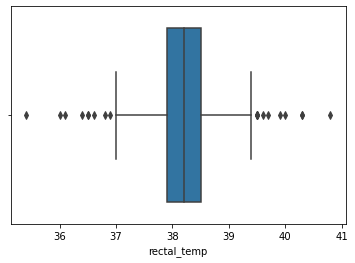

In [13]:
#seeing outliers in rectal_temp
sb.boxplot(horsesrv.rectal_temp)

<AxesSubplot:ylabel='Frequency'>

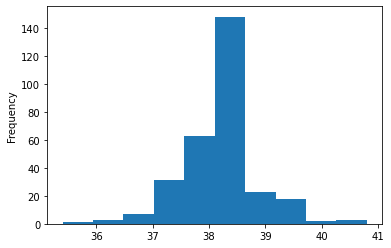

In [14]:
#using histogram to see abnormally high values
horsesrv.rectal_temp.plot.hist()

<AxesSubplot:ylabel='Density'>

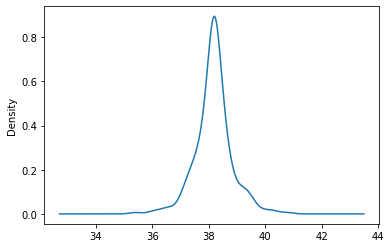

In [15]:
#checking distribution for rectal_temp
horsesrv.rectal_temp.plot.density()

In [16]:
#outlier treatment for variable rectal_temp
horsesrv.rectal_temp.quantile([0.1, 0.25, 0.5, 0.70, 0.9, 0.95, 0.99])


0.10    37.480
0.25    37.900
0.50    38.200
0.70    38.300
0.90    38.900
0.95    39.300
0.99    40.006
Name: rectal_temp, dtype: float64

In [17]:
#seeing limits
rect_temp_out_HE=horsesrv[horsesrv.rectal_temp > 39.3].copy()
rect_temp_out_LE=horsesrv[horsesrv.rectal_temp < 37.48].copy()

In [18]:
#putting them at one place
rect_temp_out_tot=pd.concat([rect_temp_out_LE['rectal_temp'],rect_temp_out_HE['rectal_temp']])
print(len(rect_temp_out_tot))

44


In [19]:
#removing outliers
for x in horsesrv.rectal_temp:
    if x > 38.6:
        horsesrv.rectal_temp.replace(x,np.nan,inplace=True)
for x in horsesrv.rectal_temp:
    if x < 37.75:
        horsesrv.rectal_temp.replace(x,np.nan,inplace=True)
        
        

<AxesSubplot:xlabel='rectal_temp'>

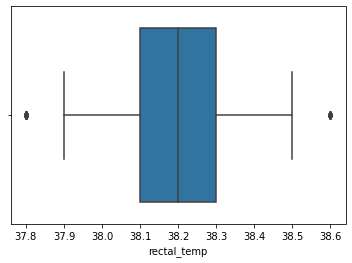

In [20]:
#checking if outliers gone 
sb.boxplot(horsesrv.rectal_temp)

In [21]:
#replacing nan values with median 
horsesrv.rectal_temp.replace(np.nan, med_rtp, inplace=True)

<AxesSubplot:xlabel='pulse'>

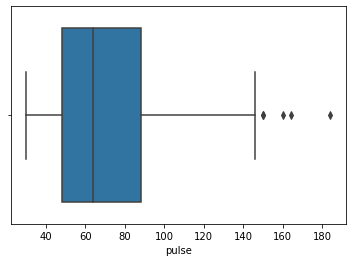

In [22]:
#seeing outliers in pulse
sb.boxplot(horsesrv.pulse)


<AxesSubplot:ylabel='Frequency'>

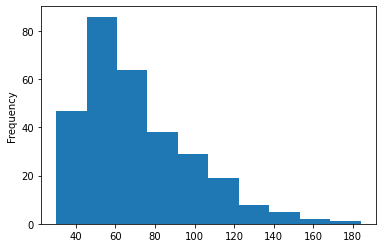

In [23]:
#using histogram to see abnormally high values
horsesrv.pulse.plot.hist()

<AxesSubplot:ylabel='Density'>

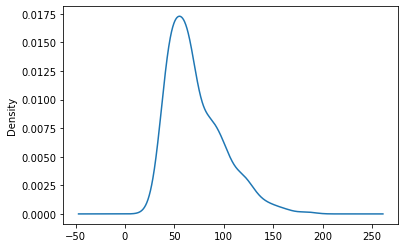

In [24]:
#checking distribution for pulse
horsesrv.pulse.plot.density()

In [25]:
#outlier treatment for variable pulse
horsesrv.pulse.quantile([0.1, 0.25, 0.5, 0.70, 0.9, 0.95, 0.99])

0.10     42.0
0.25     48.5
0.50     64.0
0.70     83.2
0.90    112.0
0.95    124.0
0.99    150.2
Name: pulse, dtype: float64

In [26]:
#seeing limits
pulse_HE=horsesrv[horsesrv.pulse > 150].copy()


In [27]:
#putting them at one place
print(len(pulse_HE))

3


In [28]:
#removing outliers
for x in horsesrv.pulse:
    if x > 145:
        horsesrv.pulse.replace(x,np.nan,inplace=True)

<AxesSubplot:xlabel='pulse'>

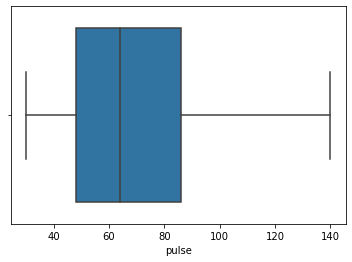

In [29]:
#checking if outliers gone 
sb.boxplot(horsesrv.pulse)

In [30]:
#replacing nan values with median 
horsesrv.pulse.replace(np.nan, med_pls, inplace=True)

<AxesSubplot:xlabel='respiratory_rate'>

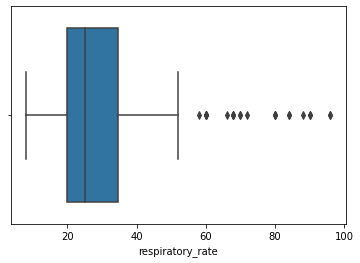

In [31]:
#seeing outliers in respiratory_rate
sb.boxplot(horsesrv.respiratory_rate)


<AxesSubplot:ylabel='Frequency'>

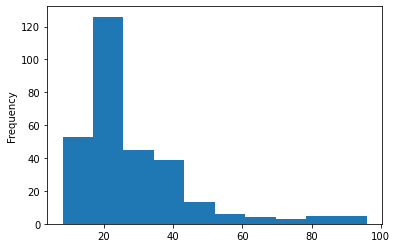

In [32]:
#using histogram to see abnormally high values
horsesrv.respiratory_rate.plot.hist()

<AxesSubplot:ylabel='Density'>

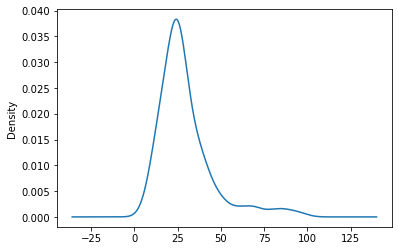

In [33]:
#checking distribution for respiratory rate
horsesrv.respiratory_rate.plot.density()

In [34]:
#outlier treatment for variable respiratory_rate
horsesrv.respiratory_rate.quantile([0.1, 0.25, 0.5, 0.70, 0.9, 0.95, 0.99])

0.10    14.8
0.25    20.0
0.50    25.0
0.70    30.0
0.90    48.0
0.95    68.0
0.99    90.0
Name: respiratory_rate, dtype: float64

In [35]:
#seeing limits
resp_rate_HE=horsesrv[horsesrv.respiratory_rate > 48].copy()


In [36]:
#putting them at one place
print(len(resp_rate_HE))

27


In [37]:
#removing outliers
for x in horsesrv.respiratory_rate:
    if x > 48:
        horsesrv.respiratory_rate.replace(x,np.nan,inplace=True)

<AxesSubplot:xlabel='respiratory_rate'>

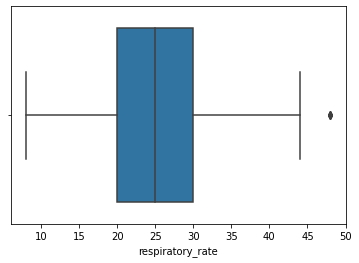

In [38]:
#checking if outliers gone 
sb.boxplot(horsesrv.respiratory_rate)


In [39]:
#replacing nan values with median 
horsesrv.respiratory_rate.replace(np.nan,med_rrt, inplace=True)

<AxesSubplot:xlabel='packed_cell_volume'>

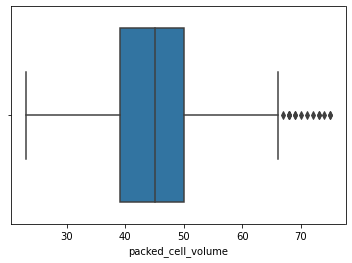

In [40]:
#seeing outliers in packed cell volume
sb.boxplot(horsesrv.packed_cell_volume)


<AxesSubplot:ylabel='Frequency'>

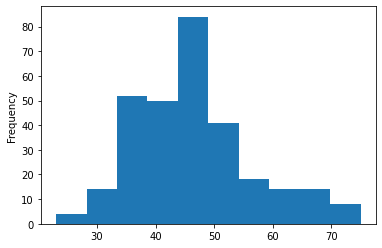

In [41]:
#using histogram to see abnormally high values
horsesrv.packed_cell_volume.plot.hist()

<AxesSubplot:ylabel='Density'>

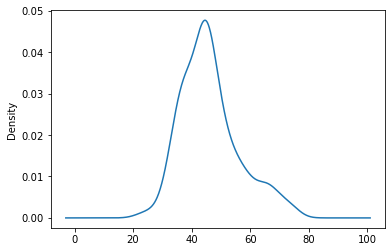

In [42]:
#checking distribution for packed_cell_volume
horsesrv.packed_cell_volume.plot.density()

In [43]:
#outlier treatment for variable packed_cell_volume
horsesrv.packed_cell_volume.quantile([0.1, 0.25, 0.5, 0.70, 0.9, 0.95, 0.99])

0.10    35.00
0.25    39.00
0.50    45.00
0.70    49.00
0.90    60.00
0.95    66.10
0.99    73.02
Name: packed_cell_volume, dtype: float64

In [44]:
#seeing limits
pack_cell_vol_out_HE=horsesrv[horsesrv.packed_cell_volume > 65].copy()

In [45]:
#putting them at one place
print(len(pack_cell_vol_out_HE))


18


In [46]:
#removing outliers
for x in horsesrv.packed_cell_volume:
    if x > 65:
        horsesrv.packed_cell_volume.replace(x,np.nan,inplace=True)

<AxesSubplot:xlabel='packed_cell_volume'>

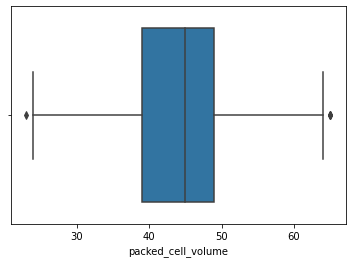

In [47]:
#checking if outliers gone 
sb.boxplot(horsesrv.packed_cell_volume)

In [48]:
#replacing nan values with median 
horsesrv.packed_cell_volume.replace(np.nan, med_pcv, inplace=True)

<AxesSubplot:xlabel='total_protein'>

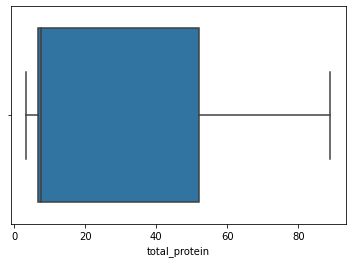

In [49]:
#seeing outliers in total_protein
sb.boxplot(horsesrv.total_protein)

**Step 3:Exploratory data analysis**

In this step, we are going to explore the dataset. Perform hypothesis tests,bivariate analysis and check for correlation between variables.

In [50]:
#summary stats
horsesrv.describe().round(2)

,hospital_number,rectal_temp,pulse,respiratory_rate,packed_cell_volume,total_protein,lesion_1,lesion_2,lesion_3
count,299.00,299.00,299.00,299.00,299.00,299.00,299.00,299.00,299.00
mean,1087732.70,38.20,69.45,25.30,44.68,22.42,3659.71,90.53,7.39
std,1532031.58,0.17,24.47,8.34,7.86,26.34,5408.47,650.64,127.75
min,518476.00,37.80,30.00,8.00,23.00,3.30,0.00,0.00,0.00
25%,528904.00,38.20,48.50,20.00,39.00,6.60,2111.50,0.00,0.00
50%,530301.00,38.20,64.00,25.00,45.00,7.50,2322.00,0.00,0.00
75%,534736.00,38.20,86.00,30.00,49.00,52.00,3209.00,0.00,0.00
max,5305629.00,38.60,140.00,48.00,65.00,89.00,41110.00,7111.00,2209.00


In [51]:
#seeing correlation of numerical variables
num_vars=['rectal_temp','pulse','respiratory_rate','packed_cell_volume','total_protein']
cordata =horsesrv[num_vars].corr()
cordata.round(2)

,rectal_temp,pulse,respiratory_rate,packed_cell_volume,total_protein
rectal_temp,1.00,0.10,0.10,-0.08,-0.04
pulse,0.10,1.00,0.33,0.42,-0.05
respiratory_rate,0.10,0.33,1.00,0.18,-0.05
packed_cell_volume,-0.08,0.42,0.18,1.00,-0.02
total_protein,-0.04,-0.05,-0.05,-0.02,1.00


<AxesSubplot:>

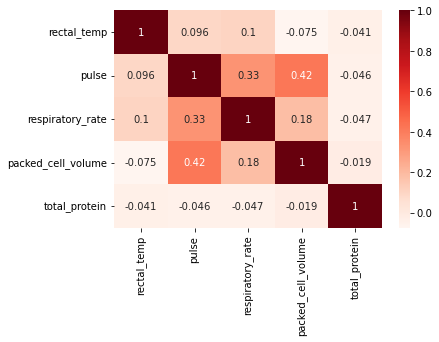

In [52]:
#heatmap of correlation
sb.heatmap(cordata, annot=True, cmap="Reds")

'blue is pedigree horse and yellow is normal'

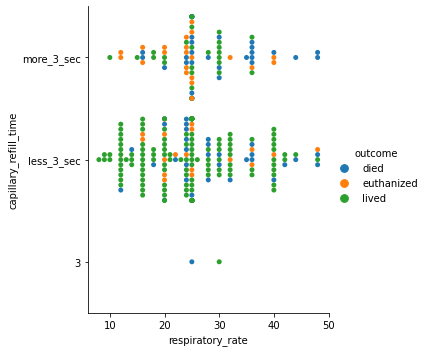

In [53]:
#Comparing respiratory rate with capillary refill time and outcome
sb.catplot(data=horsesrv, x="respiratory_rate", y='capillary_refill_time', hue="outcome", kind="swarm")
plt.rcParams['figure.figsize'] = [50, 10]

"blue is pedigree horse and yellow is normal"

'blue/yellow is dead horse and green is normal'

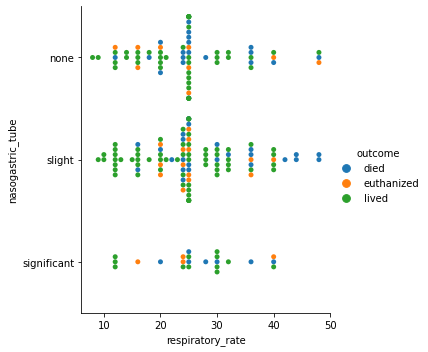

In [54]:
#Comparing respiratory_rate with nasogastric reflux and outcome
sb.catplot(data=horsesrv, x="respiratory_rate", y='nasogastric_tube', hue="outcome", kind="swarm")
plt.rcParams['figure.figsize'] = [50, 10]

"blue/yellow is dead horse and green is normal"

'blue is pedigree horse and yellow is normal'

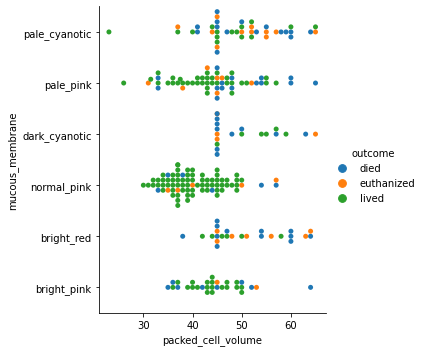

In [55]:
#Comparing pulse rate with nasogastric reflux and breed
sb.catplot(data=horsesrv, x="packed_cell_volume", y='mucous_membrane', hue="outcome", kind="swarm")
plt.rcParams['figure.figsize'] = [50, 10]

"blue is pedigree horse and yellow is normal"

<AxesSubplot:xlabel='age', ylabel='respiratory_rate'>

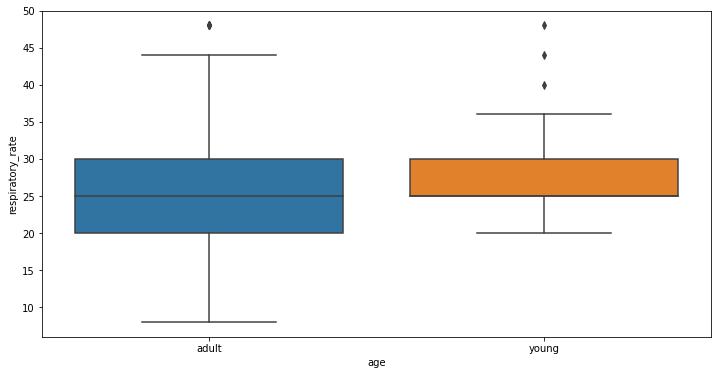

In [56]:
#box plot for age vs respiratory_rate
plt.figure(figsize=[12,6])
sb.boxplot("age", "respiratory_rate", data=horsesrv)

In [57]:
#checking if respiratory_rate differs according to the peristalsis of the horse
mod = ols("respiratory_rate ~ age", data = horsesrv).fit()
anov_table = sm.stats.anova_lm(mod)
anov_table

,df,sum_sq,mean_sq,F,PR(>F)
age,1.0,311.011998,311.011998,4.526749,0.034193
Residual,297.0,20405.496364,68.705375,NaN,NaN


<AxesSubplot:xlabel='peristalsis', ylabel='total_protein'>

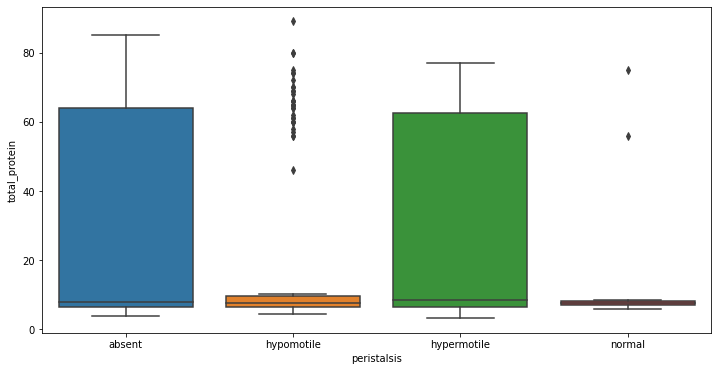

In [58]:
#box plot for peristalsis vs total protein
plt.figure(figsize=[12,6])
sb.boxplot("peristalsis", "total_protein", data=horsesrv)

In [59]:
#checking if protein  differs according to the peristalsis of the horse
mod = ols("total_protein ~ peristalsis", data = horsesrv).fit()
anov_table = sm.stats.anova_lm(mod)
anov_table

,df,sum_sq,mean_sq,F,PR(>F)
peristalsis,3.0,6154.999589,2051.666530,2.8319,0.038924
Residual,251.0,181845.489431,724.484022,NaN,NaN


<AxesSubplot:xlabel='rectal_exam_feces', ylabel='rectal_temp'>

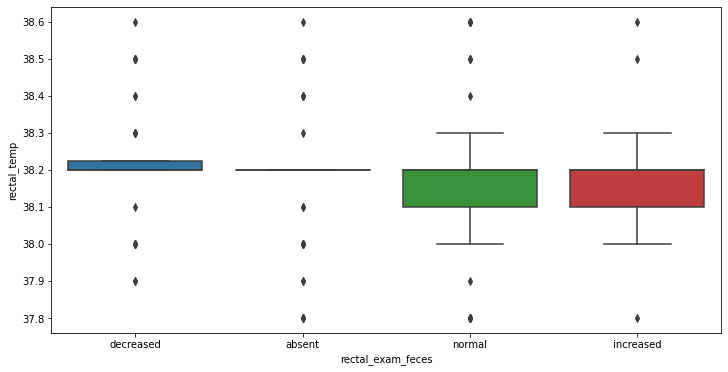

In [60]:
#box plot for rectal_temp vs rectal_exam_feces
plt.figure(figsize=[12,6])
sb.boxplot("rectal_exam_feces","rectal_temp", data=horsesrv)

In [61]:
#checking if rectal_temp  differs according to the rectal_exam_feces type of the horse
mod = ols("rectal_temp ~ rectal_exam_feces", data = horsesrv).fit()
anov_table = sm.stats.anova_lm(mod)
anov_table

,df,sum_sq,mean_sq,F,PR(>F)
rectal_exam_feces,3.0,0.049965,0.016655,0.518227,0.670218
Residual,193.0,6.202725,0.032138,NaN,NaN


<AxesSubplot:xlabel='pain', ylabel='pulse'>

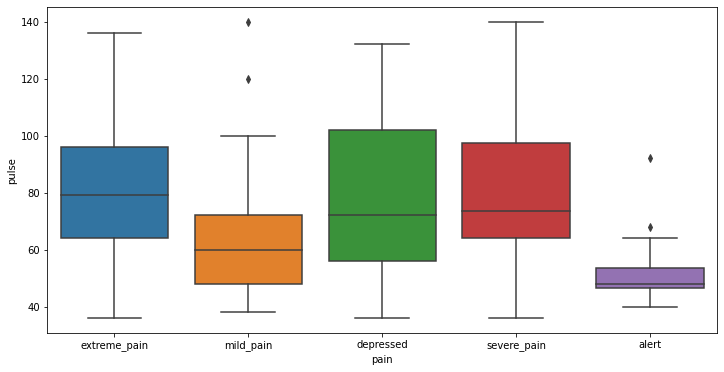

In [62]:
#box plot for pain vs pulse
plt.figure(figsize=[12,6])
sb.boxplot("pain", "pulse", data=horsesrv)

In [63]:
#checking if pulse differs according to the pain of the horse
mod = ols("pulse ~ pain", data = horsesrv).fit()
anov_table = sm.stats.anova_lm(mod)
anov_table

,df,sum_sq,mean_sq,F,PR(>F)
pain,4.0,30689.088744,7672.272186,15.59343,2.376481e-11
Residual,239.0,117592.665355,492.019520,NaN,NaN


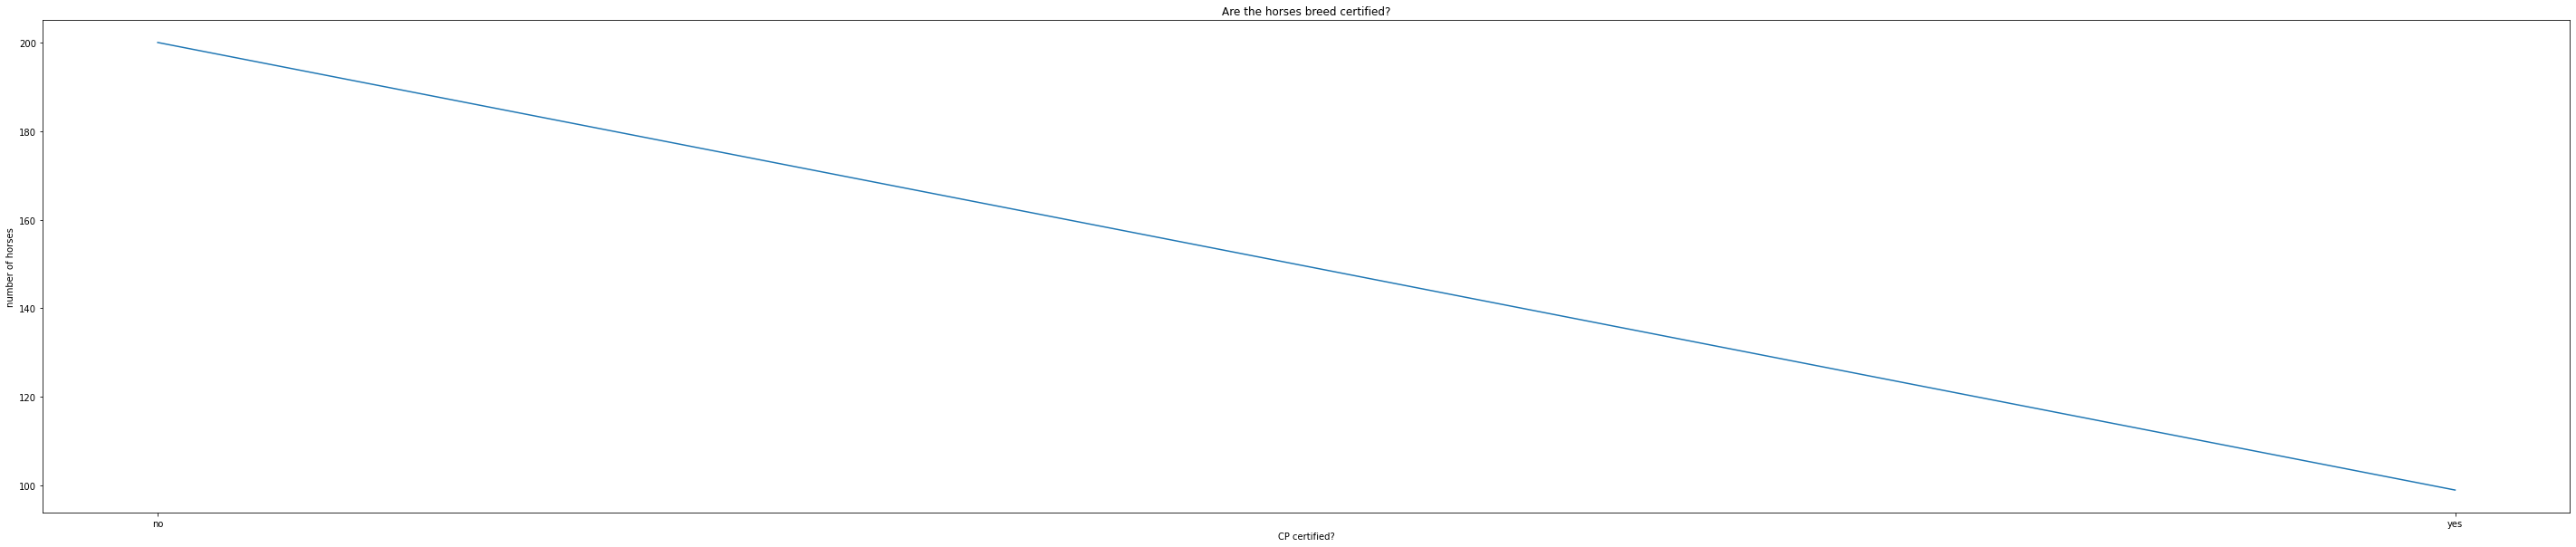

In [64]:
#Are most horses CP certified? 
breed_certified=horsesrv['cp_data'].unique()
horses=horsesrv['cp_data'].value_counts()

#plotting number of horses per breed category
plt.plot(breed_certified,horses)
plt.title('Are the horses breed certified?')
plt.xlabel('CP certified?')
plt.ylabel('number of horses')
plt.rcParams['figure.figsize'] = [17, 7]
plt.show()



In [65]:
#mortality rate
saved= horsesrv[horsesrv.outcome == 'lived']
notsaved= len(horsesrv)- len(saved)
mort_rate= notsaved/len(horsesrv)*100
print("The mortality rate of horses due to colic is {0}".format(mort_rate))

The mortality rate of horses due to colic is 40.468227424749166


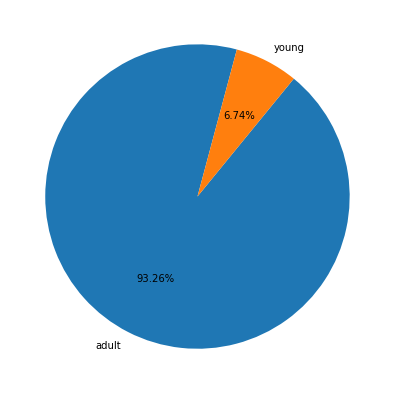

In [66]:
#which age group of horse was most likely to survive?
age=saved['age'].unique()
numbers=saved['age'].value_counts()

#age wise survival percentage
plt.pie(numbers, labels = age, startangle = 75,autopct='%.2f%%')
plt.show()

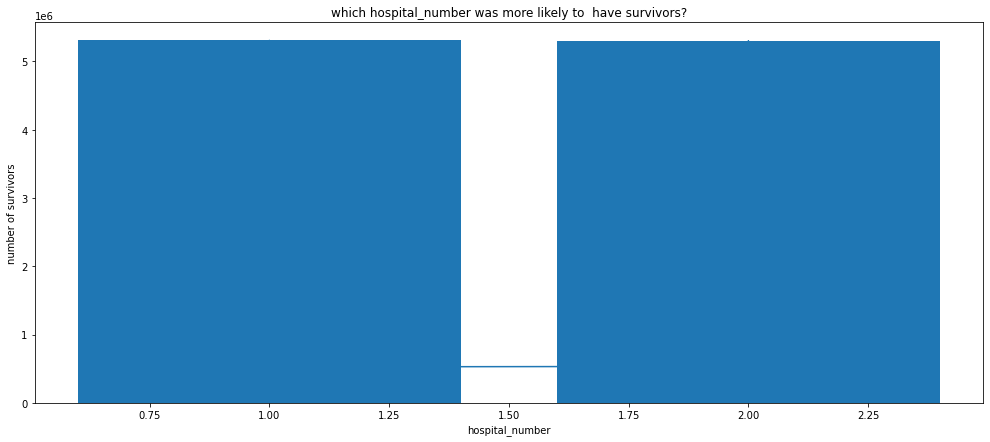

In [67]:
#which hospital_number was more likely to  have survivors
hospital=saved['hospital_number'].unique()
survivors=saved['hospital_number'].value_counts()

#plotting survivors per hospital number
plt.bar(survivors,hospital)

plt.plot(survivors,hospital)
plt.title('which hospital_number was more likely to  have survivors?')
plt.xlabel('hospital_number')
plt.ylabel('number of survivors')
plt.rcParams['figure.figsize'] = [17, 7]
plt.show()

In [68]:
#checking number of survivors pain type 
saved['pain'].value_counts()

mild_pain       54
alert           35
depressed       33
extreme_pain    12
severe_pain     10
Name: pain, dtype: int64

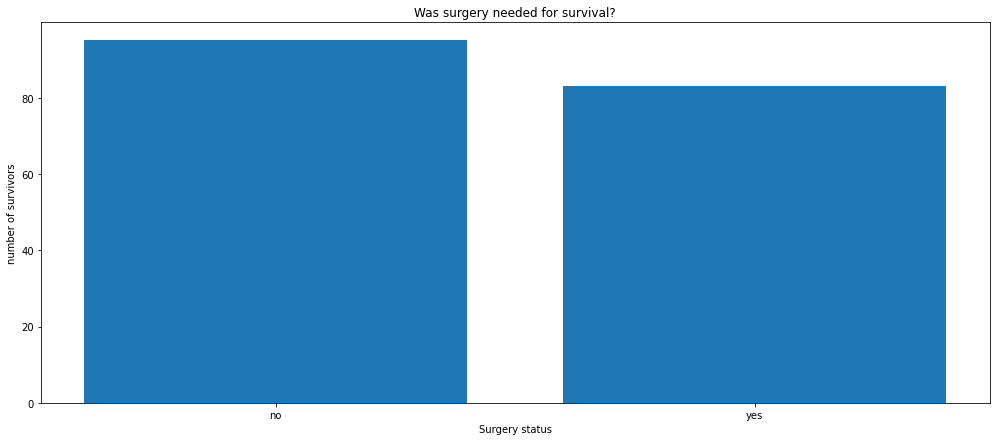

In [69]:
#which hospital_number was more likely to  have survivors
surgery=saved['surgery'].unique()
survivors=saved['surgery'].value_counts()

#plotting surivors per surgery type
plt.bar(surgery,survivors)

plt.title('Was surgery needed for survival?')
plt.xlabel('Surgery status')
plt.ylabel('number of survivors')
plt.rcParams['figure.figsize'] = [17, 7]
plt.show()

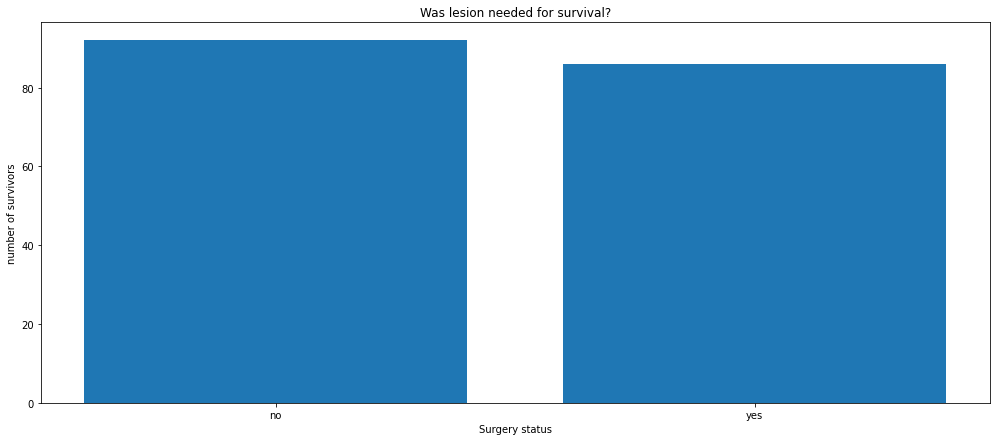

In [70]:
#Did surgerical lesion save horses?
lesion=saved['surgical_lesion'].unique()
survivors=saved['surgical_lesion'].value_counts()

#plotting surivors per lesion type
plt.bar(lesion,survivors)

plt.title('Was lesion needed for survival?')
plt.xlabel('Surgery status')
plt.ylabel('number of survivors')
plt.rcParams['figure.figsize'] = [17, 7]
plt.show()

In [71]:
#seeing number of nasogastric reflux
saved['nasogastric_reflux'].value_counts()

none            80
less_1_liter    16
more_1_liter    15
Name: nasogastric_reflux, dtype: int64

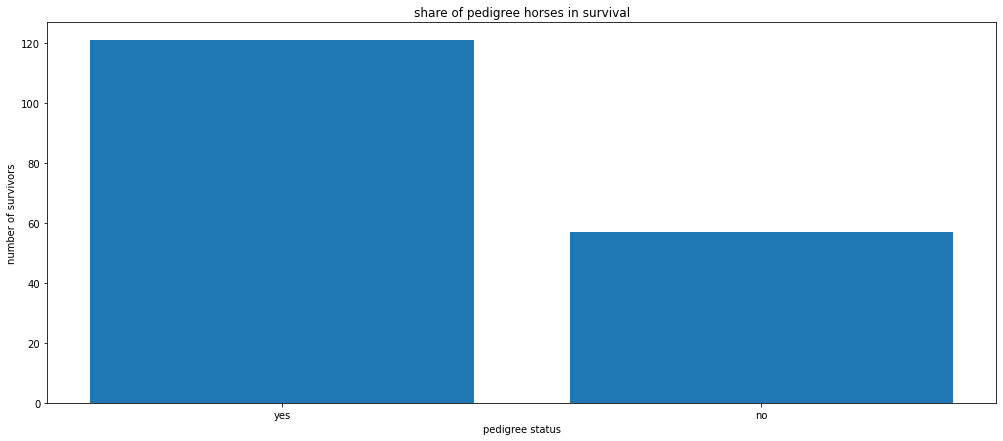

In [72]:
#were pedigree horses more likely to survive?
ped=saved['cp_data'].unique()
survivors=saved['cp_data'].value_counts()

#plotting surivors per pedigree group
plt.bar(ped,survivors)

plt.title('share of pedigree horses in survival')
plt.xlabel('pedigree status')
plt.ylabel('number of survivors')
plt.rcParams['figure.figsize'] = [17, 7]
plt.show()

'blue is pedigree horse and yellow is normal'

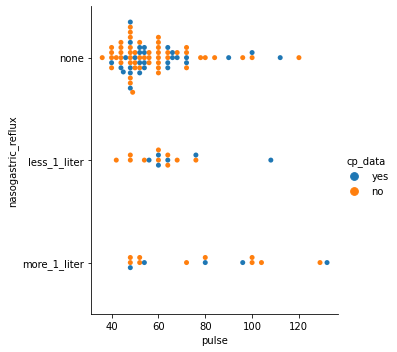

In [73]:
#Comparing pulse rate with nasogastric reflux and breed
sb.catplot(data=saved, x="pulse", y='nasogastric_reflux', hue="cp_data", kind="swarm")
plt.rcParams['figure.figsize'] = [50, 10]

"blue is pedigree horse and yellow is normal"

'blue is pedigree horse and yellow is normal'

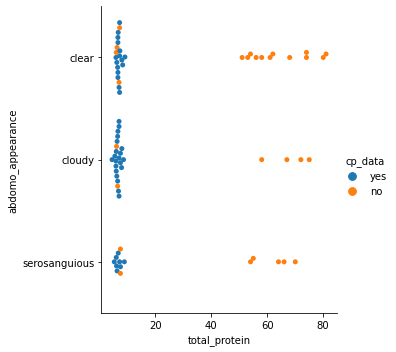

In [74]:
#Comparing total protein with breed and abdomo appearance
sb.catplot(data=saved, x="total_protein", y='abdomo_appearance', hue="cp_data", kind="swarm")
plt.rcParams['figure.figsize'] = [50, 10]

"blue is pedigree horse and yellow is normal"

'blue is pedigree horse and yellow is normal'

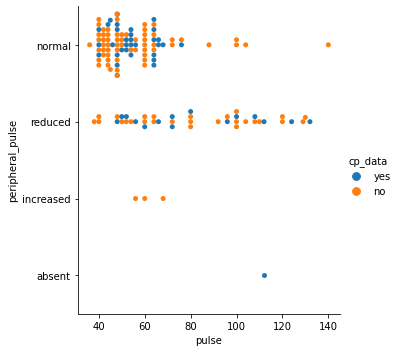

In [75]:
#Comparing pulse rate with peripheral pulse and breed
sb.catplot(data=saved, x="pulse", y='peripheral_pulse', hue="cp_data", kind="swarm")
plt.rcParams['figure.figsize'] = [50, 10]

"blue is pedigree horse and yellow is normal"

**Findings**

*Note: My findings may or may not be medically accurate. i am not a vet or a horse expert.*

Respiratory rate is correlated with pulse and packed cell volume

Adult horses are more likely to survive colic

Adult horses  have a higher respiratory rate

The amount of protein affects the peristalsis level

Rectal exam temperature levels affect the rectal affect temperature.

Horses in higher level of pain have a higher pulse rate

40% horses will die due to colic

All hospitals offer the same chance of survival

About two thirds horses are not certified only one thirds are. 

Most horses didnt need surgical lesion to survive

Giving nasogastric reflux is a sign of colic and surviving horses didnt give nasogastric reflux

Pedigreed horses were more likely to survive. 

Those who mostly didnt gave nasogastric reflux were having normal pulse rates and both types of horses were equally likely

Most of the horses that lived needed a slight nasogastric tube to survive and had a normal respiratory rate

The horses that survived has a normal pink mucuous membrane and a cell volume between 30 to 50. 

The surviving horses(mostly non pedigree) had a normal peripheral pulse and a rate of 60 to 80. 

Those who had a capillary refill time of less than 3 seconds were more likely to survive irrespective of respiratory rate.

Among the Horses that survived pedigreed horses had lower protein and cloudier abdomo appearances. 


**Step 4: Model Building**

Now we are going to build the Decision Tree classifier  to predict the horses  who is likely to make it alive The data has been cleaned and explored. 

In [76]:
#creating target variable which is the outcome of the horse
target=horsesrv['outcome']

In [77]:
#removing target variable from main dataframe
horsesrv= horsesrv.drop(['outcome'], axis=1)

In [79]:
#defining category variables
category_variables=['surgery', 'age', 'temp_of_extremities','peripheral_pulse',
        'mucous_membrane', 'capillary_refill_time', 'pain', 'peristalsis',
        'abdominal_distention', 'nasogastric_tube', 'nasogastric_reflux', 'rectal_exam_feces', 'abdomen',
       'abdomo_appearance', 'surgical_lesion','cp_data']
category_variables

['surgery',
 'age',
 'temp_of_extremities',
 'peripheral_pulse',
 'mucous_membrane',
 'capillary_refill_time',
 'pain',
 'peristalsis',
 'abdominal_distention',
 'nasogastric_tube',
 'nasogastric_reflux',
 'rectal_exam_feces',
 'abdomen',
 'abdomo_appearance',
 'surgical_lesion',
 'cp_data']

In [80]:
#integrating them
horsesrv[category_variables]=['surgery', 'age', 'temp_of_extremities','peripheral_pulse',
        'mucous_membrane', 'capillary_refill_time', 'pain', 'peristalsis',
        'abdominal_distention', 'nasogastric_tube', 'nasogastric_reflux', 'rectal_exam_feces', 'abdomen',
       'abdomo_appearance', 'surgical_lesion','cp_data']

In [81]:
#creating dummy variables 


for category in horsesrv[category_variables]:
    horsesrv[category] = pd.get_dummies(horsesrv[category])


In [82]:
#imputing missing values
imp= SimpleImputer(missing_values=np.nan, strategy="most_frequent")
horsesrv[category_variables]= imp.fit_transform(horsesrv[category_variables])

In [83]:
#checking missing values 

horsesrv.isnull().sum()

surgery                  0
age                      0
hospital_number          0
rectal_temp              0
pulse                    0
respiratory_rate         0
temp_of_extremities      0
peripheral_pulse         0
mucous_membrane          0
capillary_refill_time    0
pain                     0
peristalsis              0
abdominal_distention     0
nasogastric_tube         0
nasogastric_reflux       0
rectal_exam_feces        0
abdomen                  0
packed_cell_volume       0
total_protein            0
abdomo_appearance        0
surgical_lesion          0
lesion_1                 0
lesion_2                 0
lesion_3                 0
cp_data                  0
dtype: int64

In [84]:
#checking the new dummy variables
horsesrv.head()

,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,...,rectal_exam_feces,abdomen,packed_cell_volume,total_protein,abdomo_appearance,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data
0,1,1,530101,38.5,66.0,28.0,1,1,1,1,...,1,1,45.0,8.4,1,1,11300,0,0,1
1,1,1,534817,38.2,88.0,20.0,1,1,1,1,...,1,1,50.0,85.0,1,1,2208,0,0,1
2,1,1,530334,38.3,40.0,24.0,1,1,1,1,...,1,1,33.0,6.7,1,1,0,0,0,1
3,1,1,5290409,38.2,64.0,25.0,1,1,1,1,...,1,1,48.0,7.2,1,1,2208,0,0,1
4,1,1,530255,38.2,104.0,35.0,1,1,1,1,...,1,1,45.0,7.4,1,1,4300,0,0,1


In [85]:
#checking shape of transformed dataset
horsesrv.shape

(299, 25)

In [86]:
#getting classifier

dct=DecisionTreeClassifier()

dct

DecisionTreeClassifier()

In [87]:
#initializing label encoder
le=LabelEncoder()
le

LabelEncoder()

In [88]:
#standard scaler initiate
sc=StandardScaler()

In [89]:
#transforming target variable
target=le.fit_transform(target)
target

array([0, 1, 2, 0, 0, 2, 2, 0, 1, 2, 2, 2, 2, 0, 2, 0, 0, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 2, 0, 1, 2, 2, 2, 1, 1, 2, 2, 0, 0, 2, 2, 1,
       1, 0, 2, 2, 0, 0, 2, 0, 2, 2, 1, 0, 2, 0, 0, 0, 2, 2, 0, 1, 2, 2,
       2, 2, 2, 2, 1, 2, 0, 0, 0, 1, 2, 2, 0, 2, 0, 2, 2, 0, 2, 2, 0, 1,
       2, 2, 2, 0, 2, 0, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 0, 2, 2, 2, 1, 0,
       0, 2, 2, 0, 2, 2, 2, 1, 2, 2, 2, 1, 2, 0, 1, 2, 2, 2, 1, 2, 0, 0,
       2, 0, 0, 0, 2, 2, 2, 2, 0, 0, 2, 1, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 1, 2, 2, 2, 0, 2, 1, 2, 1, 2, 2, 2, 1, 2, 0, 2, 0, 0, 2, 2,
       0, 2, 1, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 1, 0, 2,
       2, 2, 0, 1, 2, 2, 1, 2, 0, 1, 2, 0, 0, 2, 2, 2, 2, 2, 2, 1, 2, 1,
       2, 2, 2, 2, 2, 0, 2, 1, 2, 2, 0, 2, 2, 2, 0, 2, 2, 1, 1, 0, 2, 0,
       2, 2, 0, 2, 0, 2, 2, 1, 0, 0, 2, 2, 0, 1, 0, 2, 0, 2, 2, 2, 0, 2,
       1, 2, 2, 2, 2, 0, 2, 2, 0, 1, 0, 1, 2, 2, 2, 2, 0, 0, 2, 2, 2, 1,
       2, 2, 2, 2, 0, 0, 1, 2, 1, 1, 0, 2, 1])

In [119]:
#converting to Dataframe
horsesrv= pd.DataFrame(horsesrv)
target= pd.DataFrame(target)

In [120]:
#creating X and y
X = horsesrv.values
y= target.values


In [121]:
#train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.25, random_state=1)


In [122]:
#using standard scaler
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [123]:
#fitting the model 
dct.fit(X_train,y_train)

DecisionTreeClassifier()

In [124]:
#predict
ypred= dct.predict(X_test)
ypred

array([0, 0, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 0, 2, 0, 2, 0, 2, 0, 0,
       2, 2, 0, 2, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 2, 1, 2, 1, 2, 0, 0,
       2, 0, 1, 0, 0, 2, 2, 0, 0, 0, 0, 2, 2, 2, 2, 1, 2, 2, 1, 0, 0, 0,
       2, 2, 2, 2, 2, 2, 2, 2, 0])

In [128]:

#accuracy
print("Accuracy of the model: {0}%".format(accuracy_score(y_test,ypred)*100))

Accuracy of the model: 62.66666666666667%


In [126]:
#confusion matrix
cm=confusion_matrix(y_test,ypred)
print(cm)

[[17  1  7]
 [ 1  1  5]
 [11  3 29]]


In [127]:
#printing metrics
print(classification_report(y_test,ypred))


              precision    recall  f1-score   support

           0       0.59      0.68      0.63        25
           1       0.20      0.14      0.17         7
           2       0.71      0.67      0.69        43

    accuracy                           0.63        75
   macro avg       0.50      0.50      0.50        75
weighted avg       0.62      0.63      0.62        75



In [131]:
#using random forest 
rf=RandomForestClassifier()

In [132]:
#fitting the model 
rf.fit(X_train,y_train)

RandomForestClassifier()

In [133]:
#predict
ypred= rf.predict(X_test)
ypred

array([0, 2, 0, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 0, 2, 0, 2, 0, 2, 2, 2,
       2, 0, 0, 2, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 2, 1, 2, 0, 2, 2, 1,
       2, 0, 1, 2, 0, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0,
       2, 2, 2, 2, 1, 2, 2, 2, 0])

In [134]:
#accuracy
print("Accuracy of the model: {0}%".format(accuracy_score(y_test,ypred)*100))

Accuracy of the model: 72.0%


In [135]:
#confusion matrix
cm=confusion_matrix(y_test,ypred)
print(cm)

[[17  2  6]
 [ 1  1  5]
 [ 5  2 36]]


In [136]:
#printing metrics
print(classification_report(y_test,ypred))


              precision    recall  f1-score   support

           0       0.74      0.68      0.71        25
           1       0.20      0.14      0.17         7
           2       0.77      0.84      0.80        43

    accuracy                           0.72        75
   macro avg       0.57      0.55      0.56        75
weighted avg       0.70      0.72      0.71        75



**Conclusion**

The model has 63% accuracy using decision tree which could not be improved despite data cleaning activities. Decision Tree doesnt depend on outliers and other factors. The accuracy is low due to lack of important variables and less data for training. 
By using Random forest the accuracy went upto 72%.
